# 1. Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")



In [30]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Features to be Used

Below are the preliminary features that will be used to build the model. More will be added on afterwards.

**Fatigue**
- Days since Home Team played last match 
- Days since Away Team played last match

**Home Team Form**
- Goals difference of home team in the last x matches    
- Goals difference of home team in the last x home matches    
- Average number of points gained by home team in the last x matches
- Average number of points gained by home team in the last x home matches
- Home Team Win streak 

**Away Team Form**
- Goals difference of away team in the last x matches  
- Goals difference of away team in the last x away matches
- Average number of points gained by away team in the last x matches
- Average number of points gained by away team in the last x away matches
- Away Team Win streak

**Home Team Performance Index**
- Home Defense Performance Index
- Home Midfield Performance Index
- Home Attack Performance Index

**Away Team Performance Index**
- Away Defense Performance Index
- Away Midfield Performance Index
- Away Attack Performance Index

**Betting Odds**
- B365H
- B365D
- B365A

In [31]:
df = pd.read_csv('datasets/integrated_dataset.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HPoss,HDays,ADays,HxG,AxG
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.40,4.50,8.50,D,NaN,NaT,-274,NaN,NaN
1,2012-08-18,fulham,norwich,5.0,0.0,11.0,4.0,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0,1.80,3.60,4.50,W,NaN,-274,-274,NaN,NaN
2,2012-08-18,newcastle,tottenham,2.0,1.0,6.0,12.0,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0,2.50,3.40,2.75,W,NaN,-274,-274,NaN,NaN
3,2012-08-18,qpr,swansea,0.0,5.0,20.0,12.0,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0,2.00,3.40,3.80,L,NaN,-274,-274,NaN,NaN
4,2012-08-18,reading,stoke,1.0,1.0,9.0,6.0,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0,2.38,3.25,3.10,D,NaN,-274,-274,NaN,NaN


In [32]:
df.shape

(3800, 26)

# 3. EDA

## 3.1 Get Overview of the Dataset.

Firstly, we will try to gain an overview of the dataset that we will be working with.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3800 non-null   object 
 1   HomeTeam  3800 non-null   object 
 2   AwayTeam  3800 non-null   object 
 3   FTHG      3800 non-null   float64
 4   FTAG      3800 non-null   float64
 5   HS        3800 non-null   float64
 6   AS        3800 non-null   float64
 7   HST       3800 non-null   float64
 8   AST       3800 non-null   float64
 9   HF        3800 non-null   float64
 10  AF        3800 non-null   float64
 11  HC        3800 non-null   float64
 12  AC        3800 non-null   float64
 13  HY        3800 non-null   float64
 14  AY        3800 non-null   float64
 15  HR        3800 non-null   float64
 16  AR        3800 non-null   float64
 17  B365H     3800 non-null   float64
 18  B365D     3800 non-null   float64
 19  B365A     3800 non-null   float64
 20  Result    3800 non-null   obje

From the output above, we can see that each variable seems to have suitable data type. We can also see that the column HPoss has 760 null values, while both the columns HxG and AxG has 1900 null values. This already tells us that these three columns are not suitable to be used as features.

In [34]:
df = df.drop(['HPoss', 'HxG', 'AxG'], axis=1)

## 3.2 View Descriptive Measures of Data.

For each numerical column, we will try to gain an intuition regarding the descriptive measures of it.

In [35]:
df.describe()

,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.517632,1.218947,13.976579,11.357895,5.034737,4.150000,10.524474,10.876053,5.845789,4.727105,1.527368,1.723684,0.055000,0.075526,2.925095,4.198047,4.904376
std,1.307320,1.189123,5.638652,4.880765,2.933294,2.522471,3.394238,3.562055,3.097249,2.699771,1.213154,1.255875,0.237066,0.274053,2.168801,1.353576,4.298677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,2.800000,1.120000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.660000,3.400000,2.300000
50%,1.000000,1.000000,13.000000,11.000000,5.000000,4.000000,10.000000,11.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.250000,3.700000,3.400000
75%,2.000000,2.000000,17.000000,14.000000,7.000000,6.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,3.250000,4.347500,5.500000
max,9.000000,9.000000,43.000000,31.000000,20.000000,20.000000,24.000000,26.000000,19.000000,17.000000,7.000000,9.000000,2.000000,2.000000,23.000000,17.000000,41.000000


From the table, it is easy to see that the home team tends to perform better than the away team during a match for the most part.

In [36]:
# use boxplots to visualize outliers
# sns.boxplot(x='price',y='num_of_doors',data=auto)

## 3.3 Visualize Correlations

In football, the higher the goals you score in a match, the higher the chance you have of winning the match. In this section, we are interested in identifying the variables that are most influential in determining the number of goals scored. Specifically, we will ask ourselves these two questions:

- **Which Home-Team-related-variables correlates most to FTHG?**

- **Which Away-Team-related-variables correlates most to ATHG?**

In [37]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D',
       'B365A', 'Result', 'HDays', 'ADays'],
      dtype='object')

In [38]:
ht_df = df[['Date', 'HomeTeam', 'FTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'HDays']]
at_df = df[['Date', 'AwayTeam', 'FTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'ADays']]

C:\Users\choibs\AppData\Local\Temp\ipykernel_10952\1043046740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ht_df.corr(),cbar=True,annot=True)


<AxesSubplot:>

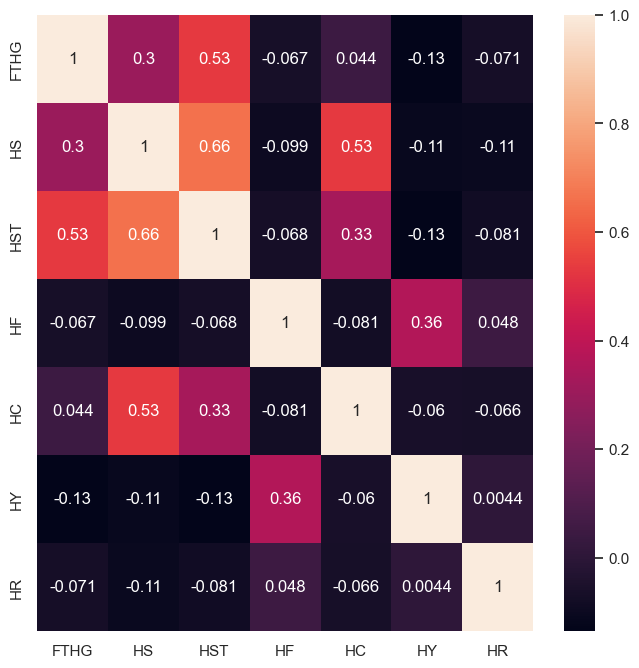

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(ht_df.corr(),cbar=True,annot=True)

**Which Home-Team-related-variables correlates most to FTHG (Goals Scored by Home Team) ?**

Both the HS (Number of Shots for Home Team) and HST (Number of Shots on Target for Home Team) have relatively high correlation to FTHG. This suggests that HS and HST can be a useful predictor for the outcome of a football match.

C:\Users\choibs\AppData\Local\Temp\ipykernel_10952\3401602531.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(at_df.corr(),cbar=True,annot=True)


<AxesSubplot:>

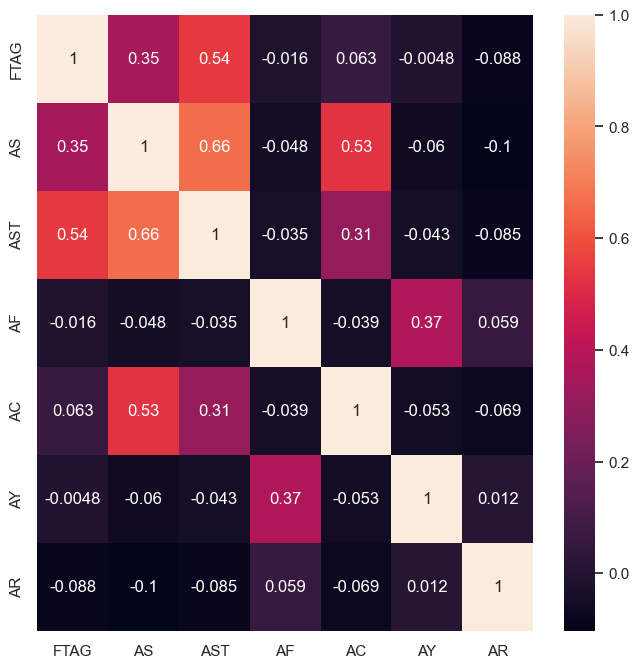

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(at_df.corr(),cbar=True,annot=True)

**Which Away-Team-related-variables correlates most to ATHG?**

Both the AS (Number of Shots for Away Team) and AST (Number of Shots on Target for Away Team) have relatively high correlation to FTAG. This suggests that AS and AST can be a useful predictor for the outcome of a football match.

## 3.4 Analyze Relationships between Variables

### 3.4.1 How does the number of shots affect the outcome of the match?

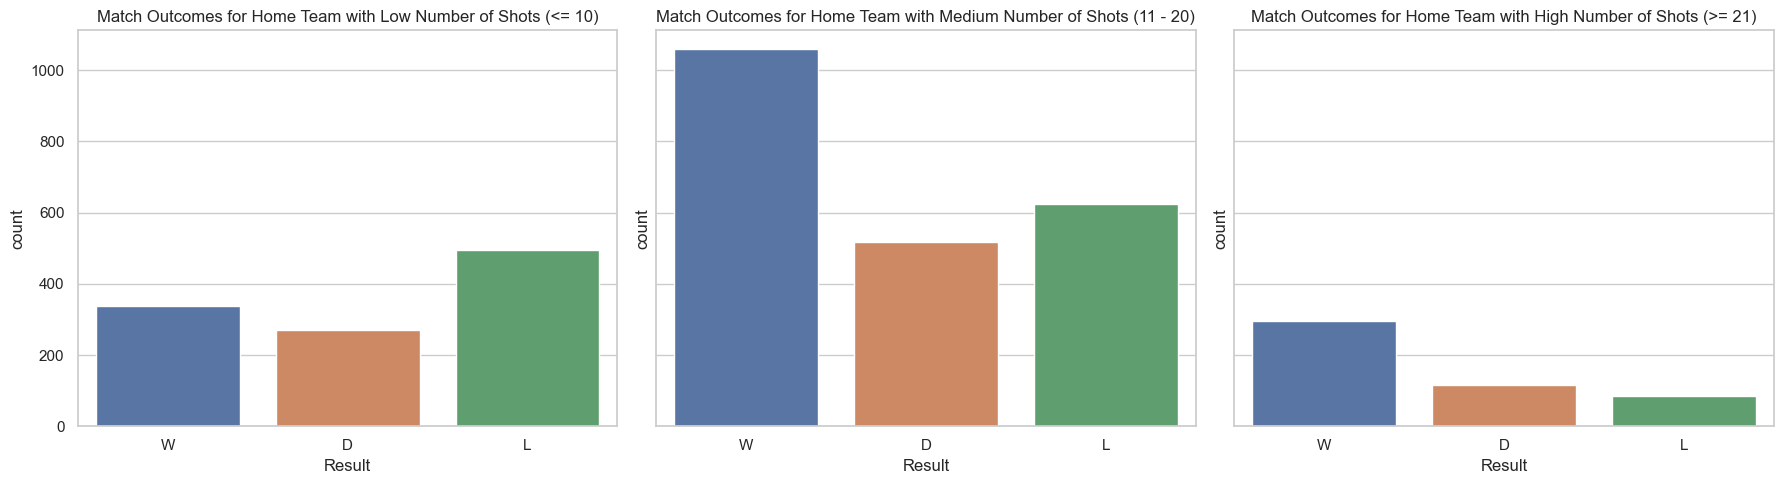

In [41]:
lowAmountOfShots_df = df[(df['HS'] <= 10)]
mediumAmountOfShots_df = df[(df['HS'] >= 11) & (df['HS'] <= 20)]
highAmountOfShots_df = df[(df['HS'] >= 21)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[0].set_title('Match Outcomes for Home Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[1].set_title('Match Outcomes for Home Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[2].set_title('Match Outcomes for Home Team with High Number of Shots (>= 21)')

plt.tight_layout()

C:\Users\choibs\AppData\Local\Temp\ipykernel_10952\711522923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_10952\711522923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_10952\711522923.py:7: Setti

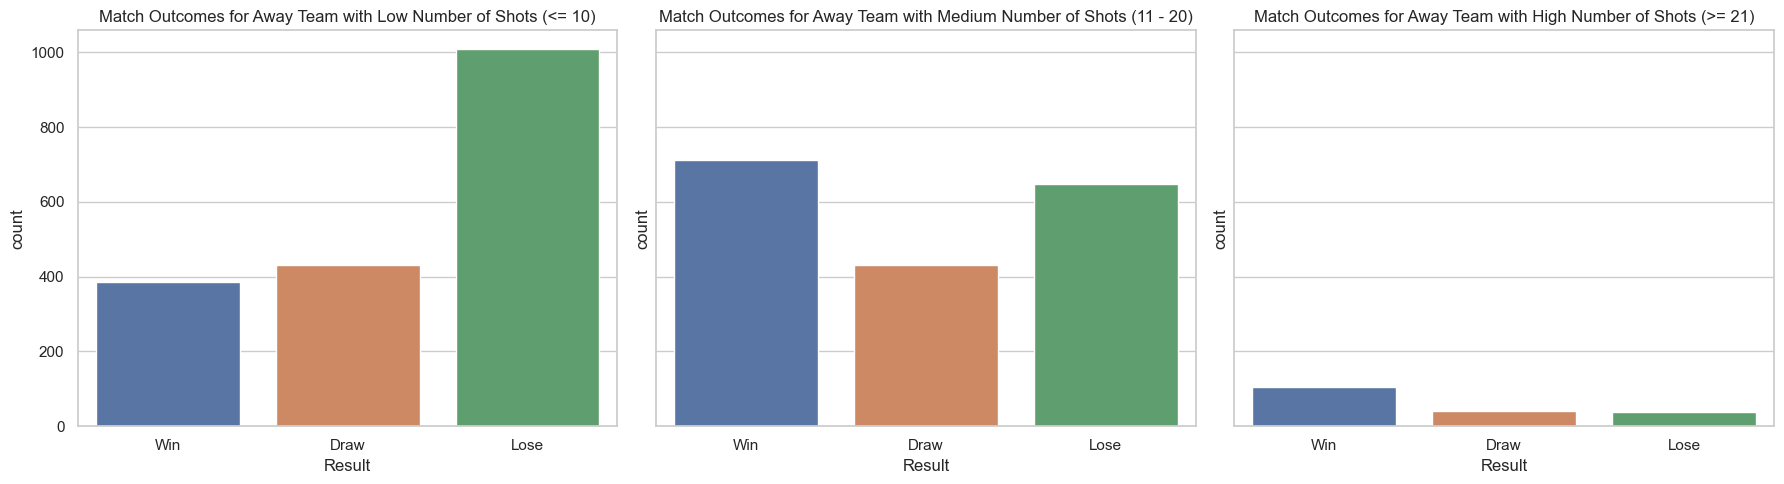

In [42]:
lowAmountOfShots_df = df[(df['AS'] <= 10)]
mediumAmountOfShots_df = df[(df['AS'] >= 11) & (df['AS'] <= 20)]
highAmountOfShots_df = df[(df['AS'] >= 21)]

lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
highAmountOfShots_df['Result'] = highAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[0].set_title('Match Outcomes for Away Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[1].set_title('Match Outcomes for Away Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[2].set_title('Match Outcomes for Away Team with High Number of Shots (>= 21)')

plt.tight_layout()

Compare percentages of win% in first plot and last plot. Describe how you do binning.

### 3.4.2 How does the number of shots on target affect the outcome of the match?

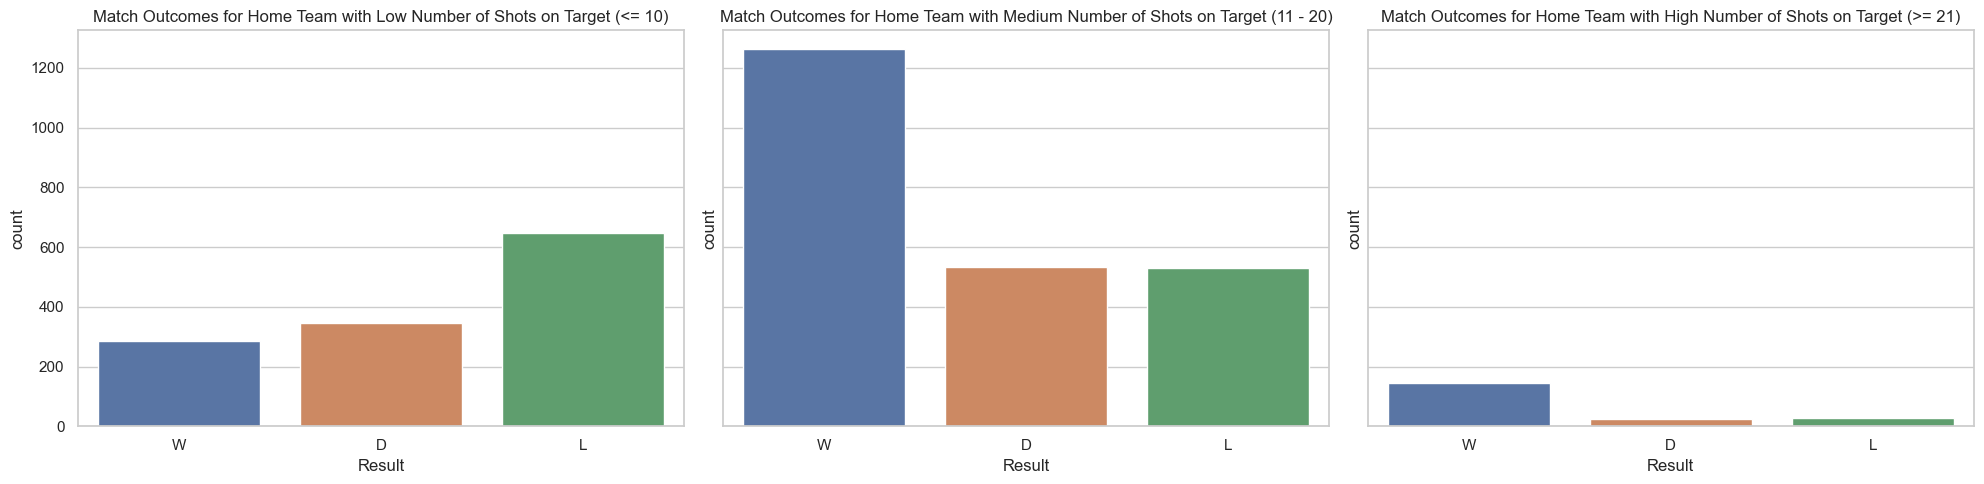

In [43]:
lowAmountOfShots_df = df[(df['HST'] <= 3)]
mediumAmountOfShots_df = df[(df['HST'] >= 4) & (df['HST'] <= 10)]
highAmountOfShots_df = df[(df['HST'] >= 11)]

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[0].set_title('Match Outcomes for Home Team with Low Number of Shots on Target (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[1].set_title('Match Outcomes for Home Team with Medium Number of Shots on Target (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[2].set_title('Match Outcomes for Home Team with High Number of Shots on Target (>= 21)')

plt.tight_layout()

C:\Users\choibs\AppData\Local\Temp\ipykernel_10952\2075144645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_10952\2075144645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_10952\2075144645.py:7: Se

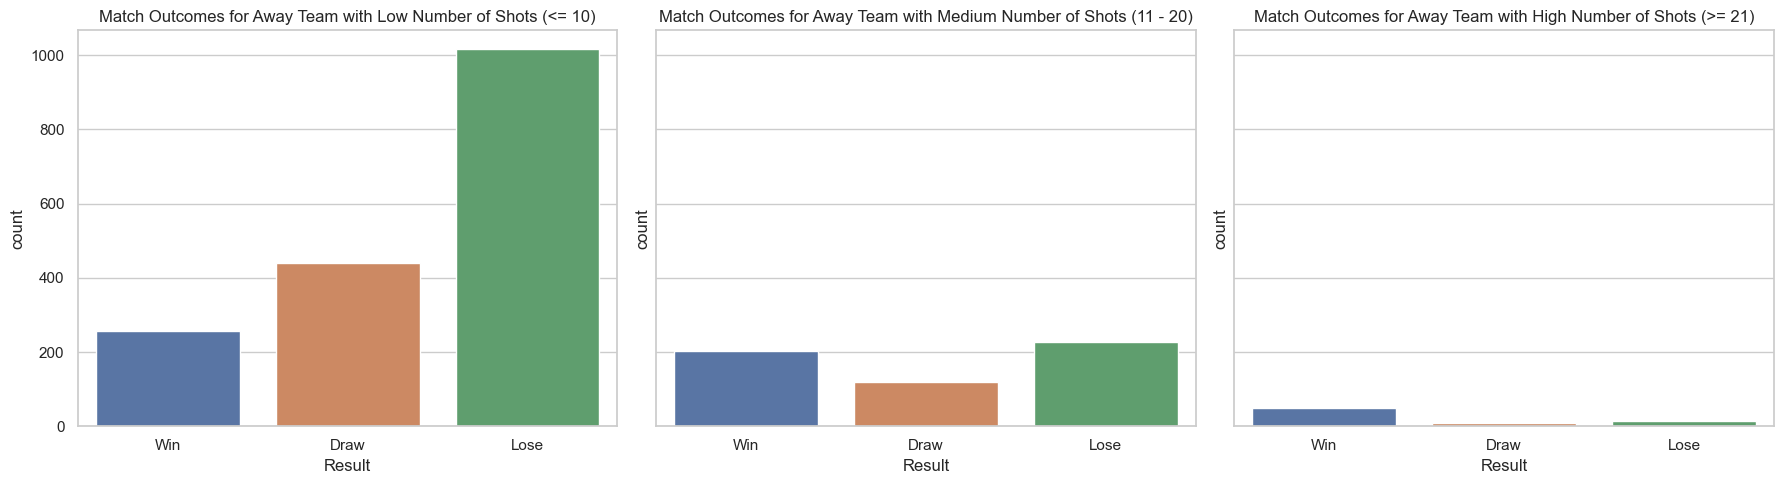

In [44]:
lowAmountOfShots_df = df[(df['AST'] <= 3)]
mediumAmountOfShots_df = df[(df['AST'] >= 4) & (df['AS'] <= 10)]
highAmountOfShots_df = df[(df['AST'] >= 11)]

lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
highAmountOfShots_df['Result'] = highAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[0].set_title('Match Outcomes for Away Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[1].set_title('Match Outcomes for Away Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[2].set_title('Match Outcomes for Away Team with High Number of Shots (>= 21)')

plt.tight_layout()

Compare percentages of win% in first plot and last plot. Describe how you do binning.

### 3.4.4 What is the relationship between betting odds and the match outcome?

In [45]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.40,4.50,8.50,D,NaT,-274
1,2012-08-18,fulham,norwich,5.0,0.0,11.0,4.0,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0,1.80,3.60,4.50,W,-274,-274
2,2012-08-18,newcastle,tottenham,2.0,1.0,6.0,12.0,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0,2.50,3.40,2.75,W,-274,-274
3,2012-08-18,qpr,swansea,0.0,5.0,20.0,12.0,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0,2.00,3.40,3.80,L,-274,-274
4,2012-08-18,reading,stoke,1.0,1.0,9.0,6.0,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0,2.38,3.25,3.10,D,-274,-274


In [46]:
def getB365Pred(row):
    cols = ['B365H', 'B365D', 'B365A']
    
    lowest = 'B365H'
    for c in cols:
        if row[c] < row[lowest]:
            lowest = c
    
    if lowest[-1] == 'H':
        return 'W'
    if lowest[-1] == 'A':
        return 'L'
    else:
        return lowest[-1]

df['B365 Prediction'] = df.apply(getB365Pred, axis=1)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays,B365 Prediction
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.40,4.50,8.50,D,NaT,-274,W
1,2012-08-18,fulham,norwich,5.0,0.0,11.0,4.0,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0,1.80,3.60,4.50,W,-274,-274,W
2,2012-08-18,newcastle,tottenham,2.0,1.0,6.0,12.0,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0,2.50,3.40,2.75,W,-274,-274,W
3,2012-08-18,qpr,swansea,0.0,5.0,20.0,12.0,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0,2.00,3.40,3.80,L,-274,-274,W
4,2012-08-18,reading,stoke,1.0,1.0,9.0,6.0,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0,2.38,3.25,3.10,D,-274,-274,W


In [47]:
df['B365 Prediction'].unique()

array(['W', 'L'], dtype=object)

In [48]:
from sklearn import metrics

# confusion_matrix = metrics.confusion_matrix(df['Result'].tolist(), df['B365 Prediction'].tolist())
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

actual = df['Result'].tolist()
predicted = df['B365 Prediction'].tolist()

metrics.confusion_matrix(actual, predicted, labels=['W', 'D', 'L'])

array([[1409,    0,  285],
       [ 617,    0,  286],
       [ 514,    0,  689]], dtype=int64)

### 3.4.6 Does the number of days between matches affect the match outcome?

In [49]:
df['HDays'].unique()

array(['NaT', '-274', '-273', '-272', '3', '7', '5', '6', '8', '13', '14',
       '25', '16', '4', '15', '9', '11', '10', '12', '-267', '-266',
       '-265', '21', '2', '-281', '-280', '-285', '-283', '-279', '-287',
       '-286', '17', '-295', '-291', '-294', '22', '18', '-351', '-372',
       '-350', '100', '101', '104', '105', '106', '-253', '-255', '-252',
       '-251', '-246', '-282'], dtype=object)

In [50]:
df['ADays'].unique()

array(['-274', '9', '-273', '-272', '4', '5', '2', '7', '6', '8', '14',
       '13', '21', '15', '3', '11', '10', '12', '16', '-267', '-266',
       '-265', '19', '-281', '-287', '-280', '-279', '18', '-284', '-275',
       '17', '22', '-352', '-351', '-371', '-357', 'NaT', '-350', '102',
       '104', '99', '103', '100', '105', '107', '-253', '-252', '-258',
       '-251', '-250', '23', '20'], dtype=object)

In [51]:
def transform_DaysLastPlayed(word):
    if word == 'NaT':
        return 'High'
    
    if int(word) < 0 or int(word) >= 5:
        return 'High'
    elif int(word) < 5:
        return 'Low'
    
df['HDays'] = df['HDays'].apply(lambda x: transform_DaysLastPlayed(x))
df['ADays'] = df['ADays'].apply(lambda x: transform_DaysLastPlayed(x))
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays,B365 Prediction
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.40,4.50,8.50,D,High,High,W
1,2012-08-18,fulham,norwich,5.0,0.0,11.0,4.0,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0,1.80,3.60,4.50,W,High,High,W
2,2012-08-18,newcastle,tottenham,2.0,1.0,6.0,12.0,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0,2.50,3.40,2.75,W,High,High,W
3,2012-08-18,qpr,swansea,0.0,5.0,20.0,12.0,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0,2.00,3.40,3.80,L,High,High,W
4,2012-08-18,reading,stoke,1.0,1.0,9.0,6.0,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0,2.38,3.25,3.10,D,High,High,W


## 3.6 Remove Redundant Variables

In [52]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Result,HDays,ADays,B365 Prediction
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.40,4.50,8.50,D,High,High,W
1,2012-08-18,fulham,norwich,5.0,0.0,11.0,4.0,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0,1.80,3.60,4.50,W,High,High,W
2,2012-08-18,newcastle,tottenham,2.0,1.0,6.0,12.0,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0,2.50,3.40,2.75,W,High,High,W
3,2012-08-18,qpr,swansea,0.0,5.0,20.0,12.0,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0,2.00,3.40,3.80,L,High,High,W
4,2012-08-18,reading,stoke,1.0,1.0,9.0,6.0,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0,2.38,3.25,3.10,D,High,High,W


In [53]:
df.drop(['HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365 Prediction'], axis=1, inplace=True)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,B365H,B365D,B365A,Result,HDays,ADays
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,1.40,4.50,8.50,D,High,High
1,2012-08-18,fulham,norwich,5.0,0.0,11.0,4.0,9.0,2.0,1.80,3.60,4.50,W,High,High
2,2012-08-18,newcastle,tottenham,2.0,1.0,6.0,12.0,4.0,6.0,2.50,3.40,2.75,W,High,High
3,2012-08-18,qpr,swansea,0.0,5.0,20.0,12.0,11.0,8.0,2.00,3.40,3.80,L,High,High
4,2012-08-18,reading,stoke,1.0,1.0,9.0,6.0,3.0,3.0,2.38,3.25,3.10,D,High,High


## 3.7 Encode Categorical Data

In [54]:
# from sklearn.preprocessing import OneHotEncoder 

# ohc = OneHotEncoder() 
# ohe = ohc.fit_transform(df.Temperature.values.reshape(-1,1)).toarray() 
# dfOneHot = pd.DataFrame(ohe, columns = ["Temp_" + str(ohc.categories_[0][1]) for i in range(len(ohc.categories_[0]))]) 
# dfOneHot = dfOneHot.astype(int)
# dfh = pd.concat([df, dfOneHot], axis=1)  

# dfh

In [55]:
from sklearn.preprocessing import LabelEncoder

df['HDays'] = LabelEncoder().fit_transform(df['HDays'])
df['ADays'] = LabelEncoder().fit_transform(df['HDays'])
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,B365H,B365D,B365A,Result,HDays,ADays
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,1.40,4.50,8.50,D,0,0
1,2012-08-18,fulham,norwich,5.0,0.0,11.0,4.0,9.0,2.0,1.80,3.60,4.50,W,0,0
2,2012-08-18,newcastle,tottenham,2.0,1.0,6.0,12.0,4.0,6.0,2.50,3.40,2.75,W,0,0
3,2012-08-18,qpr,swansea,0.0,5.0,20.0,12.0,11.0,8.0,2.00,3.40,3.80,L,0,0
4,2012-08-18,reading,stoke,1.0,1.0,9.0,6.0,3.0,3.0,2.38,3.25,3.10,D,0,0


## 3.8 Normalize Data 

(through normalizing, scaling, or standardizing the data)

# 4. Feature Engineering

In [56]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,B365H,B365D,B365A,Result,HDays,ADays
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,1.40,4.50,8.50,D,0,0
1,2012-08-18,fulham,norwich,5.0,0.0,11.0,4.0,9.0,2.0,1.80,3.60,4.50,W,0,0
2,2012-08-18,newcastle,tottenham,2.0,1.0,6.0,12.0,4.0,6.0,2.50,3.40,2.75,W,0,0
3,2012-08-18,qpr,swansea,0.0,5.0,20.0,12.0,11.0,8.0,2.00,3.40,3.80,L,0,0
4,2012-08-18,reading,stoke,1.0,1.0,9.0,6.0,3.0,3.0,2.38,3.25,3.10,D,0,0


## Average Number of Shots by Home Team in the Last x Matches

In [61]:
def getShots(row, team):
    if row['HomeTeam'] == team:
        return row['HS']
    else:
        return row['AS']

In [58]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots'] = team_df.apply(lambda row: getShots(row, team), axis=1)
    
    number_of_previous_matches = 5
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots'].shift(i)
    
    team_df['HASL5M'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [65]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,B365H,B365D,B365A,Result,HDays,ADays,HASL5M
0,2012-08-18,arsenal,sunderland,0.0,0.0,14.0,3.0,4.0,2.0,1.40,4.50,8.5,D,0,0,NaN
1,2012-09-15,arsenal,southampton,6.0,1.0,20.0,9.0,12.0,4.0,1.36,5.00,8.5,W,0,0,NaN
2,2012-09-29,arsenal,chelsea,1.0,2.0,14.0,10.0,5.0,5.0,2.10,3.40,3.5,L,0,0,14.2
3,2012-10-27,arsenal,qpr,1.0,0.0,21.0,4.0,11.0,3.0,1.36,5.00,8.5,W,1,1,15.4
4,2012-11-10,arsenal,fulham,3.0,3.0,15.0,9.0,9.0,5.0,1.53,4.20,6.0,D,1,1,15.0
5,2012-11-17,arsenal,tottenham,5.0,2.0,13.0,6.0,10.0,4.0,1.91,3.75,3.8,W,0,0,15.2
6,2012-12-01,arsenal,swansea,0.0,2.0,10.0,12.0,8.0,10.0,1.44,4.50,7.0,L,1,1,12.0
7,2012-12-08,arsenal,west-brom,2.0,0.0,16.0,7.0,7.0,2.0,1.50,4.33,6.5,W,1,1,12.6
8,2012-12-29,arsenal,newcastle,7.0,3.0,16.0,10.0,12.0,8.0,1.44,4.50,7.0,W,0,0,14.6
9,2013-01-13,arsenal,city,0.0,2.0,9.0,16.0,4.0,9.0,2.63,3.50,2.8,L,0,0,14.6


In [62]:
df.shape

(3800, 16)

## Goals Difference of Home Team in the Last x Matches

In [670]:
def getGoalsScoredByTeam(row, team):
    if row['HomeTeam'] == team:
        return row['FTHG']
    elif row['AwayTeam'] == team:
        return row['FTAG']

In [671]:
def getGoalsScoredByOpponent(row, team):
    if row['HomeTeam'] == team:
        return row['FTAG']
    elif row['AwayTeam'] == team:
        return row['FTHG']

In [672]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    number_of_previous_matches = 5
    column1 = 0;
    column2 = 0;
    
    team_df['GoalsScoredByTeam'] = team_df.apply(lambda row: getGoalsScoredByTeam(row, team), axis=1)
    team_df['GoalsScoredByOpponent'] = team_df.apply(lambda row: getGoalsScoredByOpponent(row, team), axis=1)
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['GoalsScoredByTeam'].shift(i)
        column2 += team_df['GoalsScoredByOpponent'].shift(i)
    
    team_df['HGDL5M'] = column1 - column2
    team_df.drop(columns=['GoalsScoredByTeam', 'GoalsScoredByOpponent'], inplace=True)
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [673]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.50,8.5,D,0,0,NaN
1,2012-09-15,arsenal,southampton,6.0,1.0,1.36,5.00,8.5,W,0,0,NaN
2,2012-09-29,arsenal,chelsea,1.0,2.0,2.10,3.40,3.5,L,0,0,7.0
3,2012-10-27,arsenal,qpr,1.0,0.0,1.36,5.00,8.5,W,1,1,5.0
4,2012-11-10,arsenal,fulham,3.0,3.0,1.53,4.20,6.0,D,1,1,0.0
5,2012-11-17,arsenal,tottenham,5.0,2.0,1.91,3.75,3.8,W,0,0,1.0
6,2012-12-01,arsenal,swansea,0.0,2.0,1.44,4.50,7.0,L,1,1,2.0
7,2012-12-08,arsenal,west-brom,2.0,0.0,1.50,4.33,6.5,W,1,1,1.0
8,2012-12-29,arsenal,newcastle,7.0,3.0,1.44,4.50,7.0,W,0,0,4.0
9,2013-01-13,arsenal,city,0.0,2.0,2.63,3.50,2.8,L,0,0,10.0


In [674]:
df.shape

(3800, 12)

## Goals Difference of Home Team in the Last x Home Matches

In [675]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    
    number_of_previous_matches = 5
    column1 = 0;
    column2 = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['FTHG'].shift(i)
        column2 += team_df['FTAG'].shift(i)

    team_df['HGDL5HM'] = column1 - column2
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [676]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.50,8.5,D,0,0,NaN,NaN
1,2012-09-15,arsenal,southampton,6.0,1.0,1.36,5.00,8.5,W,0,0,NaN,NaN
2,2012-09-29,arsenal,chelsea,1.0,2.0,2.10,3.40,3.5,L,0,0,7.0,NaN
3,2012-10-27,arsenal,qpr,1.0,0.0,1.36,5.00,8.5,W,1,1,5.0,NaN
4,2012-11-10,arsenal,fulham,3.0,3.0,1.53,4.20,6.0,D,1,1,0.0,NaN
5,2012-11-17,arsenal,tottenham,5.0,2.0,1.91,3.75,3.8,W,0,0,1.0,5.0
6,2012-12-01,arsenal,swansea,0.0,2.0,1.44,4.50,7.0,L,1,1,2.0,8.0
7,2012-12-08,arsenal,west-brom,2.0,0.0,1.50,4.33,6.5,W,1,1,1.0,1.0
8,2012-12-29,arsenal,newcastle,7.0,3.0,1.44,4.50,7.0,W,0,0,4.0,4.0
9,2013-01-13,arsenal,city,0.0,2.0,2.63,3.50,2.8,L,0,0,10.0,7.0


In [677]:
df.shape

(3800, 13)

## Average Number of Points Gained by Home Team in the Last x Matches

In [678]:
def getPointsGained(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 3
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 0
    else:
        if row['Result'] == 'W':
            return 0
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 3

In [679]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row, team), axis=1)
    
    number_of_previous_matches = 5
    column = 0
    
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['HAPL5M'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [680]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.50,8.5,D,0,0,NaN,NaN,NaN
1,2012-09-15,arsenal,southampton,6.0,1.0,1.36,5.00,8.5,W,0,0,NaN,NaN,NaN
2,2012-09-29,arsenal,chelsea,1.0,2.0,2.10,3.40,3.5,L,0,0,7.0,NaN,1.8
3,2012-10-27,arsenal,qpr,1.0,0.0,1.36,5.00,8.5,W,1,1,5.0,NaN,1.4
4,2012-11-10,arsenal,fulham,3.0,3.0,1.53,4.20,6.0,D,1,1,0.0,NaN,1.2
5,2012-11-17,arsenal,tottenham,5.0,2.0,1.91,3.75,3.8,W,0,0,1.0,5.0,1.4
6,2012-12-01,arsenal,swansea,0.0,2.0,1.44,4.50,7.0,L,1,1,2.0,8.0,1.2
7,2012-12-08,arsenal,west-brom,2.0,0.0,1.50,4.33,6.5,W,1,1,1.0,1.0,1.2
8,2012-12-29,arsenal,newcastle,7.0,3.0,1.44,4.50,7.0,W,0,0,4.0,4.0,2.0
9,2013-01-13,arsenal,city,0.0,2.0,2.63,3.50,2.8,L,0,0,10.0,7.0,2.6


In [681]:
df.shape

(3800, 14)

## Average Number of Points Gained by Home Team in the Last x Home Matches

In [682]:
def getPointsGained(row):
    if row['Result'] == 'W':
        return 3
    elif row['Result'] == 'D':
        return 1
    elif row['Result'] == 'L':
        return 0

In [683]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team)]
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
    
    number_of_previous_matches = 5
    column = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['HAPL5HM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13296\1435245815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13296\1435245815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13296\1435245815.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [684]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.50,8.5,D,0,0,NaN,NaN,NaN,NaN
1,2012-09-15,arsenal,southampton,6.0,1.0,1.36,5.00,8.5,W,0,0,NaN,NaN,NaN,NaN
2,2012-09-29,arsenal,chelsea,1.0,2.0,2.10,3.40,3.5,L,0,0,7.0,NaN,1.8,NaN
3,2012-10-27,arsenal,qpr,1.0,0.0,1.36,5.00,8.5,W,1,1,5.0,NaN,1.4,NaN
4,2012-11-10,arsenal,fulham,3.0,3.0,1.53,4.20,6.0,D,1,1,0.0,NaN,1.2,NaN
5,2012-11-17,arsenal,tottenham,5.0,2.0,1.91,3.75,3.8,W,0,0,1.0,5.0,1.4,1.6
6,2012-12-01,arsenal,swansea,0.0,2.0,1.44,4.50,7.0,L,1,1,2.0,8.0,1.2,2.0
7,2012-12-08,arsenal,west-brom,2.0,0.0,1.50,4.33,6.5,W,1,1,1.0,1.0,1.2,1.4
8,2012-12-29,arsenal,newcastle,7.0,3.0,1.44,4.50,7.0,W,0,0,4.0,4.0,2.0,2.0
9,2013-01-13,arsenal,city,0.0,2.0,2.63,3.50,2.8,L,0,0,10.0,7.0,2.6,2.0


In [685]:
df.shape

(3800, 15)

## Home Team Win Streak

In [686]:
def getBooleanWin(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L':
            return 1
        else:
            return 0

In [687]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Win'] = team_df.apply(lambda row: getBooleanWin(row, team), axis=1)
    
    grouper = (team_df['Win'] != team_df['Win'].shift()).cumsum()
    team_df['HWinStreak'] = team_df['Win'].groupby(grouper).cumsum()
    team_df.drop(columns=['Win'], inplace=True)
    team_df['HWinStreak'] = team_df['HWinStreak'].shift(1)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [688]:
df.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak
3795,2022-03-12,brentford,burnley,2.0,0.0,2.15,3.2,3.60,W,0,0,-3.0,-4.0,0.8,0.8,1.0
3796,2022-04-10,brentford,west-ham,2.0,0.0,2.62,3.3,2.62,W,0,0,4.0,-3.0,1.8,0.8,1.0
3797,2022-04-23,brentford,tottenham,0.0,0.0,4.33,3.5,1.85,D,0,0,7.0,1.0,2.4,1.4,3.0
3798,2022-05-07,brentford,southampton,3.0,0.0,2.15,3.5,3.30,W,0,0,3.0,2.0,2.0,1.6,0.0
3799,2022-05-22,brentford,leeds,1.0,2.0,2.45,3.8,2.62,L,0,0,2.0,5.0,2.0,2.0,2.0


In [689]:
df.shape

(3800, 16)

## Goals Difference of Away Team in the Last x Matches  

In [690]:
def getGoalsScoredByTeam(row, team):
    if row['HomeTeam'] == team:
        return row['FTHG']
    elif row['AwayTeam'] == team:
        return row['FTAG']

In [691]:
def getGoalsScoredByOpponent(row, team):
    if row['HomeTeam'] == team:
        return row['FTAG']
    elif row['AwayTeam'] == team:
        return row['FTHG']

In [692]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    number_of_previous_matches = 5
    column1 = 0;
    column2 = 0;
    
    team_df['GoalsScoredByTeam'] = team_df.apply(lambda row: getGoalsScoredByTeam(row, team), axis=1)
    team_df['GoalsScoredByOpponent'] = team_df.apply(lambda row: getGoalsScoredByOpponent(row, team), axis=1)
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['GoalsScoredByTeam'].shift(i)
        column2 += team_df['GoalsScoredByOpponent'].shift(i)
    
    team_df['AGDL5M'] = column1 - column2
    team_df.drop(columns=['GoalsScoredByTeam', 'GoalsScoredByOpponent'], inplace=True)
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [693]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AGDL5M
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.50,8.50,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-01,swansea,sunderland,2.0,2.0,2.20,3.30,3.40,D,0,0,NaN,NaN,NaN,NaN,2.0,NaN
2,2012-09-22,west-ham,sunderland,1.0,1.0,2.10,3.30,3.60,D,0,0,NaN,NaN,NaN,NaN,0.0,NaN
3,2012-10-06,city,sunderland,3.0,0.0,1.29,5.50,11.00,W,1,1,3.0,NaN,1.8,NaN,1.0,1.0
4,2012-10-27,stoke,sunderland,0.0,0.0,1.95,3.30,4.20,D,0,0,-1.0,NaN,1.0,NaN,0.0,-2.0
5,2012-11-10,everton,sunderland,2.0,1.0,1.44,4.20,8.00,W,0,0,2.0,NaN,1.4,NaN,0.0,-3.0
6,2012-11-18,fulham,sunderland,1.0,3.0,1.67,3.75,5.25,L,0,0,1.0,8.0,1.4,2.0,0.0,-5.0
7,2012-12-02,norwich,sunderland,2.0,1.0,2.10,3.30,3.60,W,1,1,2.0,0.0,1.8,2.0,0.0,-2.0
8,2012-12-15,united,sunderland,3.0,1.0,1.20,6.50,15.00,W,0,0,4.0,5.0,2.4,2.4,4.0,-2.0
9,2012-12-22,southampton,sunderland,0.0,1.0,2.00,3.50,3.75,L,0,0,4.0,2.0,2.0,1.6,1.0,-2.0


## Goals Difference of Away Team in the Last x Away Matches

In [694]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    team_df = team_df.sort_values(by = 'Date')
    
    number_of_previous_matches = 5
    column1 = 0;
    column2 = 0
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['FTHG'].shift(i)
        column2 += team_df['FTAG'].shift(i)

    team_df['AGDL5AM'] = column2 - column1
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [695]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AGDL5M,AGDL5AM
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.50,8.50,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-01,swansea,sunderland,2.0,2.0,2.20,3.30,3.40,D,0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,2012-09-22,west-ham,sunderland,1.0,1.0,2.10,3.30,3.60,D,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2012-10-06,city,sunderland,3.0,0.0,1.29,5.50,11.00,W,1,1,3.0,NaN,1.8,NaN,1.0,1.0,NaN
4,2012-10-27,stoke,sunderland,0.0,0.0,1.95,3.30,4.20,D,0,0,-1.0,NaN,1.0,NaN,0.0,-2.0,NaN
5,2012-11-10,everton,sunderland,2.0,1.0,1.44,4.20,8.00,W,0,0,2.0,NaN,1.4,NaN,0.0,-3.0,-3.0
6,2012-11-18,fulham,sunderland,1.0,3.0,1.67,3.75,5.25,L,0,0,1.0,8.0,1.4,2.0,0.0,-5.0,-4.0
7,2012-12-02,norwich,sunderland,2.0,1.0,2.10,3.30,3.60,W,1,1,2.0,0.0,1.8,2.0,0.0,-2.0,-2.0
8,2012-12-15,united,sunderland,3.0,1.0,1.20,6.50,15.00,W,0,0,4.0,5.0,2.4,2.4,4.0,-2.0,-3.0
9,2012-12-22,southampton,sunderland,0.0,1.0,2.00,3.50,3.75,L,0,0,4.0,2.0,2.0,1.6,1.0,-2.0,-2.0


In [696]:
df.shape

(3800, 18)

## Average Number of Points Gained by Away Team in the Last x Matches

In [697]:
def getPointsGained(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 3
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 0
    else:
        if row['Result'] == 'W':
            return 0
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 3

In [698]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row, team), axis=1)
    
    number_of_previous_matches = 5
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['AAPL5M'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [699]:
df.head(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AGDL5M,AGDL5AM,AAPL5M
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.50,8.50,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-01,swansea,sunderland,2.0,2.0,2.20,3.30,3.40,D,0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,2012-09-22,west-ham,sunderland,1.0,1.0,2.10,3.30,3.60,D,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2012-10-06,city,sunderland,3.0,0.0,1.29,5.50,11.00,W,1,1,3.0,NaN,1.8,NaN,1.0,1.0,NaN,1.4
4,2012-10-27,stoke,sunderland,0.0,0.0,1.95,3.30,4.20,D,0,0,-1.0,NaN,1.0,NaN,0.0,-2.0,NaN,1.2
5,2012-11-10,everton,sunderland,2.0,1.0,1.44,4.20,8.00,W,0,0,2.0,NaN,1.4,NaN,0.0,-3.0,-3.0,1.0
6,2012-11-18,fulham,sunderland,1.0,3.0,1.67,3.75,5.25,L,0,0,1.0,8.0,1.4,2.0,0.0,-5.0,-4.0,0.4
7,2012-12-02,norwich,sunderland,2.0,1.0,2.10,3.30,3.60,W,1,1,2.0,0.0,1.8,2.0,0.0,-2.0,-2.0,0.8
8,2012-12-15,united,sunderland,3.0,1.0,1.20,6.50,15.00,W,0,0,4.0,5.0,2.4,2.4,4.0,-2.0,-3.0,0.8
9,2012-12-22,southampton,sunderland,0.0,1.0,2.00,3.50,3.75,L,0,0,4.0,2.0,2.0,1.6,1.0,-2.0,-2.0,0.8


In [700]:
df.shape

(3800, 19)

## Average Number of Points Gained by Away Team in the Last x Away Matches

In [701]:
def getPointsGained(row):
    if row['Result'] == 'W':
        return 0
    elif row['Result'] == 'D':
        return 1
    elif row['Result'] == 'L':
        return 3

In [702]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['AwayTeam'] == team)]
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
    team_df = team_df.sort_values(by = 'Date')
    
    number_of_previous_matches = 5
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['AAPL5AM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13296\1041028938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13296\1041028938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13296\1041028938.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [703]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.5,8.5,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-01,swansea,sunderland,2.0,2.0,2.20,3.3,3.4,D,0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,2012-09-22,west-ham,sunderland,1.0,1.0,2.10,3.3,3.6,D,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2012-10-06,city,sunderland,3.0,0.0,1.29,5.5,11.0,W,1,1,3.0,NaN,1.8,NaN,1.0,1.0,NaN,1.4,NaN
4,2012-10-27,stoke,sunderland,0.0,0.0,1.95,3.3,4.2,D,0,0,-1.0,NaN,1.0,NaN,0.0,-2.0,NaN,1.2,NaN


In [704]:
df.shape

(3800, 20)

## Away Team Win streak

In [705]:
def getBooleanWin(row, team):
    if row['AwayTeam'] == team:
        if row['Result'] == 'L':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'W':
            return 1
        else:
            return 0

In [706]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Win'] = team_df.apply(lambda row: getBooleanWin(row, team), axis=1)
    
    grouper = (team_df['Win'] != team_df['Win'].shift()).cumsum()
    team_df['AWinStreak'] = team_df['Win'].groupby(grouper).cumsum()
    team_df.drop(columns=['Win'], inplace=True)
    team_df['AWinStreak'] = team_df['AWinStreak'].shift(1)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [707]:
df.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWinStreak
3795,2022-04-16,southampton,arsenal,1.0,0.0,3.80,3.60,1.95,W,0,0,-12.0,-4.0,0.2,1.2,0.0,-3.0,5.0,1.2,2.4,0.0
3796,2022-04-20,chelsea,arsenal,2.0,4.0,1.83,3.60,4.33,L,1,1,10.0,0.0,2.4,1.6,1.0,-6.0,-1.0,0.6,1.8,0.0
3797,2022-05-01,west-ham,arsenal,1.0,2.0,4.33,3.80,1.80,L,1,1,-4.0,3.0,0.8,2.2,0.0,-1.0,0.0,1.2,1.8,2.0
3798,2022-05-12,tottenham,arsenal,3.0,0.0,2.05,3.75,3.50,W,0,0,5.0,12.0,1.6,2.4,0.0,5.0,0.0,2.4,1.8,4.0
3799,2022-05-16,newcastle,arsenal,2.0,0.0,4.33,3.60,1.83,W,0,0,-1.0,3.0,1.8,2.4,0.0,3.0,-4.0,2.4,1.2,0.0


In [708]:
df.shape

(3800, 21)

## Home Team Performance Index
- Home Defense Performance Index
- Home Midfield Performance Index
- Home Attack Performance Index

In [709]:
fifa_ratings_df = pd.read_csv('datasets/data-source-3/dataset3.csv')
fifa_ratings_df.head()

,Version,Date,Team,Attack,Midfield,Defense
0,FIFA 22,2022-08-18,liverpool,86,84,85
1,FIFA 22,2022-08-18,city,84,87,86
2,FIFA 22,2022-08-18,chelsea,84,85,83
3,FIFA 22,2022-08-18,united,82,83,81
4,FIFA 22,2022-08-18,tottenham,83,81,78


In [710]:
def getHomeTeamRatingIndex(row):
    date = row['Date']
    hometeam = row['HomeTeam']
    
    ratings_df = fifa_ratings_df[(fifa_ratings_df['Team'] == hometeam) & (fifa_ratings_df['Date'] < date)]
    ratings_row = ratings_df.sort_values(by = ['Date', 'Version'], ascending=[False, False]).iloc[0, :]
    
    row['HDef'] = ratings_row['Defense']
    row['HMid'] = ratings_row['Midfield']
    row['HAtt'] = ratings_row['Attack']
    
    return row

In [711]:
df = df.apply(getHomeTeamRatingIndex, axis=1)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWinStreak,HDef,HMid,HAtt
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.5,8.5,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84
1,2012-09-01,swansea,sunderland,2.0,2.0,2.20,3.3,3.4,D,0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0.0,73,73,73
2,2012-09-22,west-ham,sunderland,1.0,1.0,2.10,3.3,3.6,D,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,71,73,75
3,2012-10-06,city,sunderland,3.0,0.0,1.29,5.5,11.0,W,1,1,3.0,NaN,1.8,NaN,1.0,1.0,NaN,1.4,NaN,1.0,81,83,85
4,2012-10-27,stoke,sunderland,0.0,0.0,1.95,3.3,4.2,D,0,0,-1.0,NaN,1.0,NaN,0.0,-2.0,NaN,1.2,NaN,0.0,75,76,75


## Away Team Performance Index

- Away Defense Performance Index
- Away Midfield Performance Index
- Away Attack Performance Index

In [712]:
def getAwayTeamRatingIndex(row):
    date = row['Date']
    awayteam = row['AwayTeam']
    
    ratings_df = fifa_ratings_df[(fifa_ratings_df['Team'] == awayteam) & (fifa_ratings_df['Date'] < date)]
    ratings_row = ratings_df.sort_values(by = ['Date', 'Version'], ascending=[False, False]).iloc[0, :]
    
    row['ADef'] = ratings_row['Defense']
    row['AMid'] = ratings_row['Midfield']
    row['AAtt'] = ratings_row['Attack']
    
    return row

In [713]:
df = df.apply(getAwayTeamRatingIndex, axis=1)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,Result,HDays,ADays,HGDL5M,HGDL5HM,HAPL5M,HAPL5HM,HWinStreak,AGDL5M,AGDL5AM,AAPL5M,AAPL5AM,AWinStreak,HDef,HMid,HAtt,ADef,AMid,AAtt
0,2012-08-18,arsenal,sunderland,0.0,0.0,1.40,4.5,8.5,D,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,82,84,74,75,78
1,2012-09-01,swansea,sunderland,2.0,2.0,2.20,3.3,3.4,D,0,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0.0,73,73,73,74,75,77
2,2012-09-22,west-ham,sunderland,1.0,1.0,2.10,3.3,3.6,D,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,71,73,75,74,75,77
3,2012-10-06,city,sunderland,3.0,0.0,1.29,5.5,11.0,W,1,1,3.0,NaN,1.8,NaN,1.0,1.0,NaN,1.4,NaN,1.0,81,83,85,74,75,77
4,2012-10-27,stoke,sunderland,0.0,0.0,1.95,3.3,4.2,D,0,0,-1.0,NaN,1.0,NaN,0.0,-2.0,NaN,1.2,NaN,0.0,75,76,75,74,75,77


In [714]:
df.to_csv(f'datasets/cleaned_dataset.csv', index=False)